In [71]:
# Reference: https://www.kaggle.com/code/enesbeinci/airline-passenger-satisfaction-with-ml/log
#This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [72]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('train.csv')

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

train_df = train_df.iloc[:1500,::]
test_df = test_df.iloc[:300,::]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1501
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         1500 non-null   int64  
 1   id                                 1500 non-null   int64  
 2   Gender                             1500 non-null   object 
 3   Customer Type                      1500 non-null   object 
 4   Age                                1500 non-null   int64  
 5   Type of Travel                     1500 non-null   object 
 6   Class                              1500 non-null   object 
 7   Flight Distance                    1500 non-null   int64  
 8   Inflight wifi service              1500 non-null   int64  
 9   Departure/Arrival time convenient  1500 non-null   int64  
 10  Ease of Online booking             1500 non-null   int64  
 11  Gate location                      1500 non-null   int64

In [73]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [74]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [75]:
train_df.isna().sum() / train_df.shape[0] * 100

Unnamed: 0                           0.0
id                                   0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction    

In [76]:
# First of all, we start by dropping the variables hello and enes, which does not work for us, in our data.

train_df.drop(["Unnamed: 0","id"],axis=1, inplace=True)

# Finally, we convert our target variable "satisfaction" to 0 and 1 (binary) values in order to use it in machine learning and simple data analysis.

train_df.satisfaction = [1 if x == "satisfied" else 0 for x in train_df.satisfaction]

train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [77]:
train_df.columns = [x.split()[0] + "_" + x.split()[1] + "_" + x.split()[2] + "_" + x.split()[3] if len(x.split()) > 3 else x for x in train_df.columns]
train_df.columns = [x.split()[0] + "_" + x.split()[1] + "_" + x.split()[2] if len(x.split()) > 2 else x for x in train_df.columns]
train_df.columns = [x.split()[0] + "_" + x.split()[1] if len(x.split()) > 1 else x for x in train_df.columns]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1501
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             1500 non-null   object 
 1   Customer_Type                      1500 non-null   object 
 2   Age                                1500 non-null   int64  
 3   Type_of_Travel                     1500 non-null   object 
 4   Class                              1500 non-null   object 
 5   Flight_Distance                    1500 non-null   int64  
 6   Inflight_wifi_service              1500 non-null   int64  
 7   Departure/Arrival_time_convenient  1500 non-null   int64  
 8   Ease_of_Online_booking             1500 non-null   int64  
 9   Gate_location                      1500 non-null   int64  
 10  Food_and_drink                     1500 non-null   int64  
 11  Online_boarding                    1500 non-null   int64

In [78]:
def bar_plot(variable):
    # we get the features
    var = train_df[variable]
    # count number of categorical variable
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

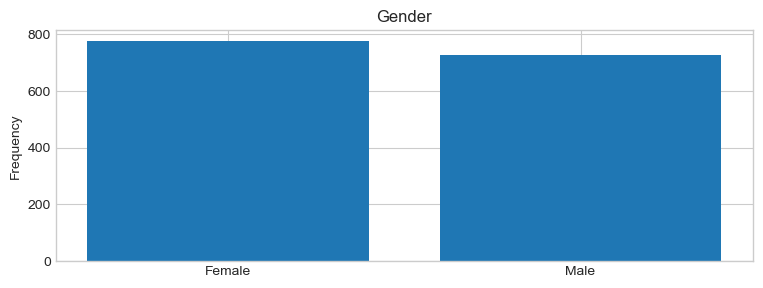

Gender: 
 Female    775
Male      725
Name: Gender, dtype: int64


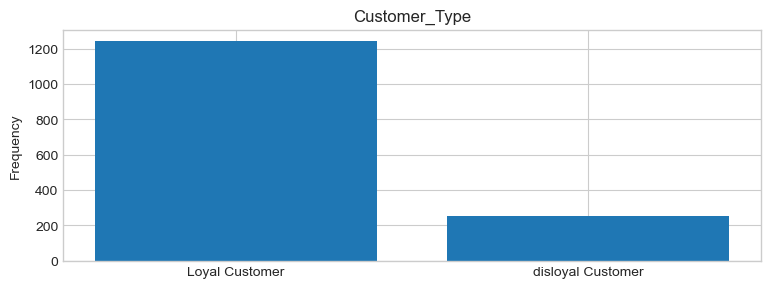

Customer_Type: 
 Loyal Customer       1245
disloyal Customer     255
Name: Customer_Type, dtype: int64


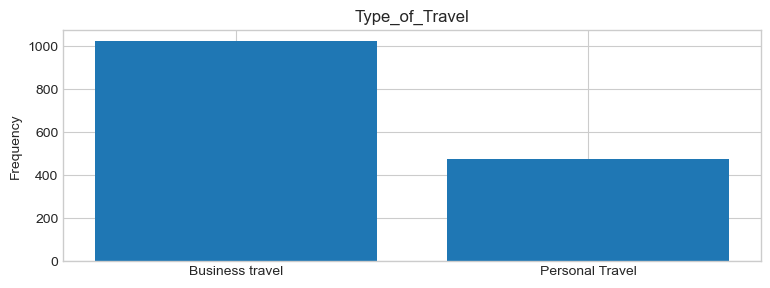

Type_of_Travel: 
 Business travel    1023
Personal Travel     477
Name: Type_of_Travel, dtype: int64


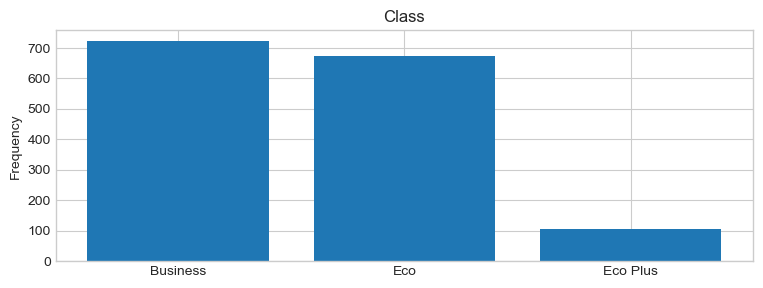

Class: 
 Business    722
Eco         672
Eco Plus    106
Name: Class, dtype: int64


In [79]:
categorical_var = ["Gender", "Customer_Type", "Type_of_Travel", "Class"]
for each in categorical_var:
    bar_plot(each)

In [80]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

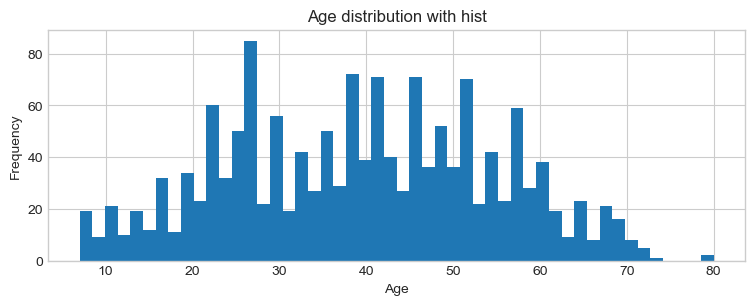

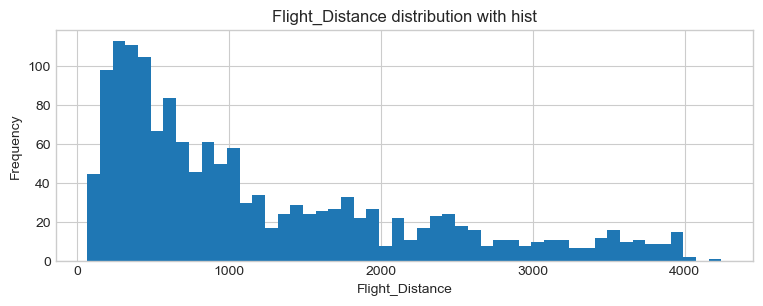

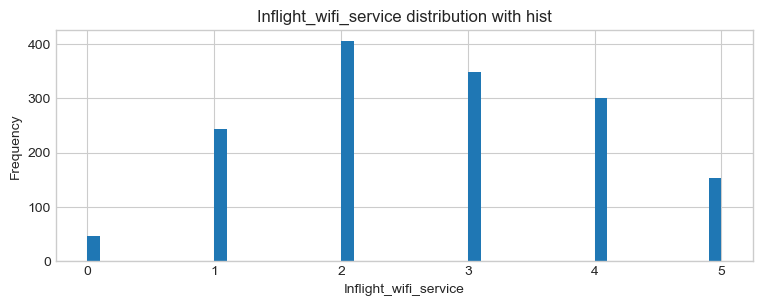

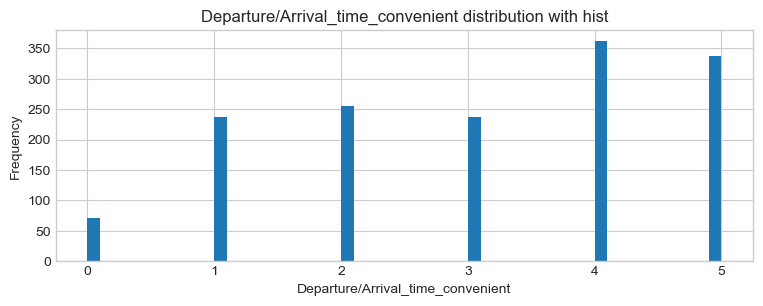

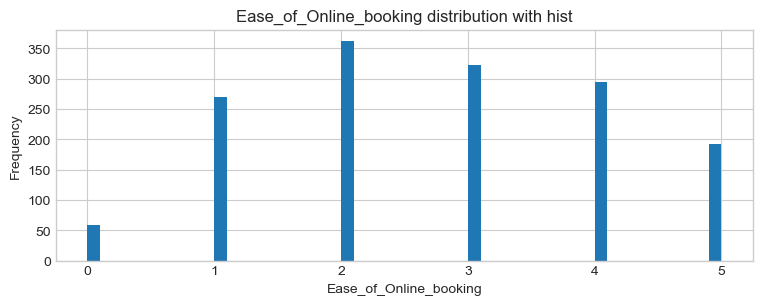

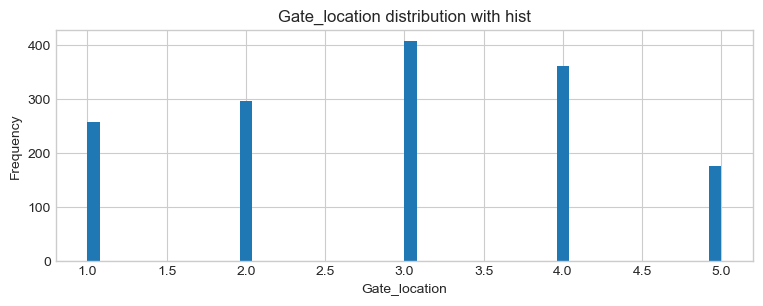

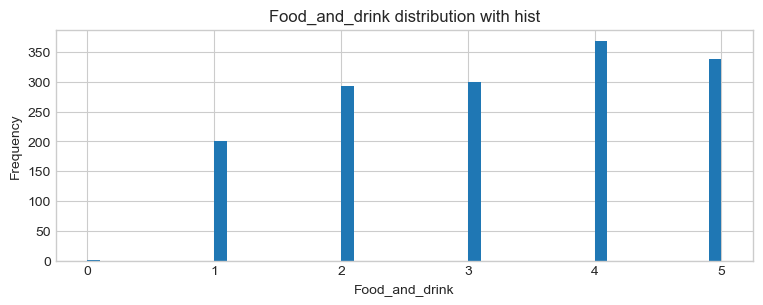

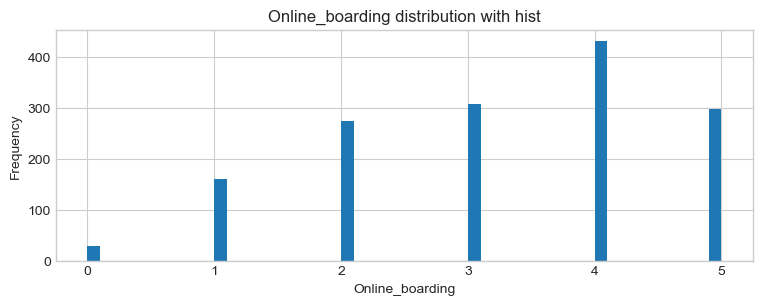

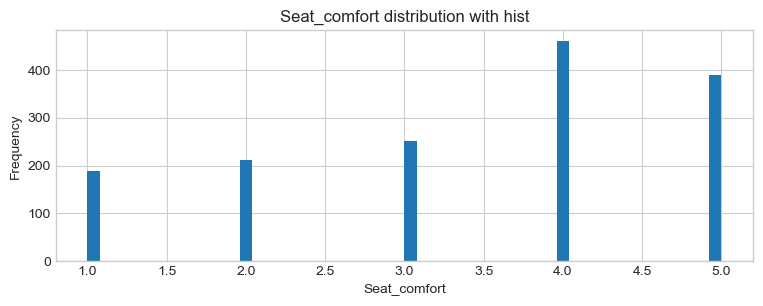

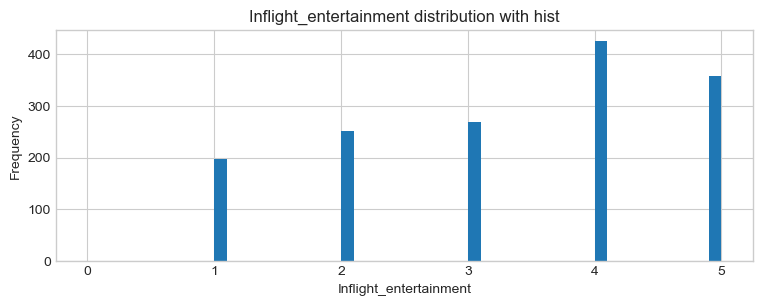

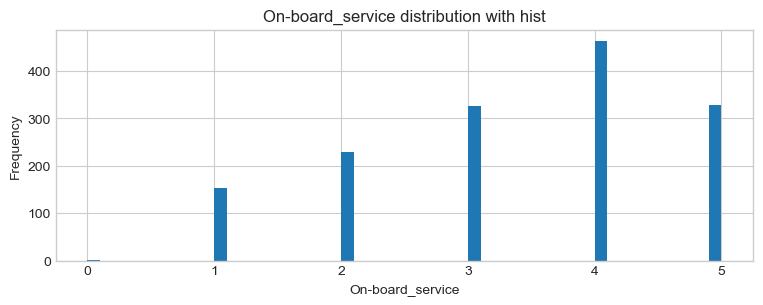

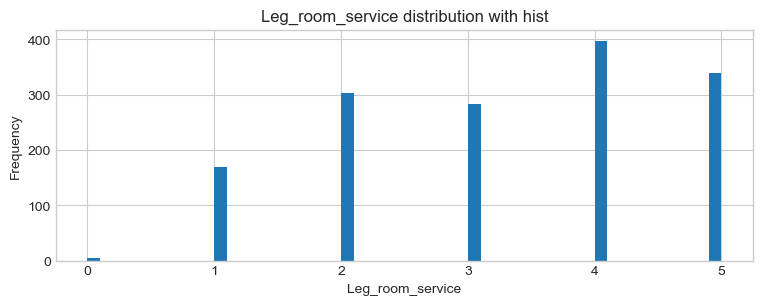

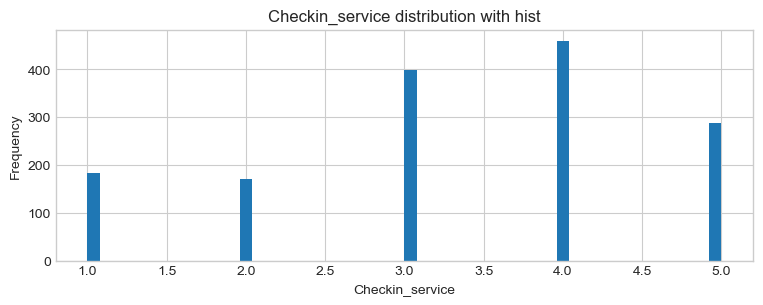

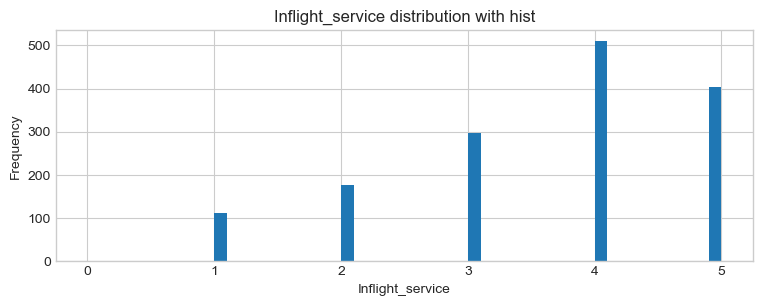

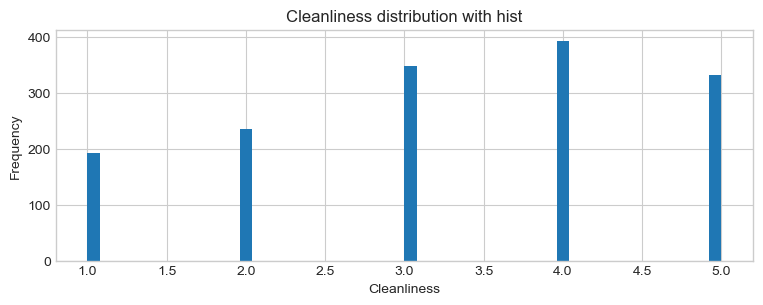

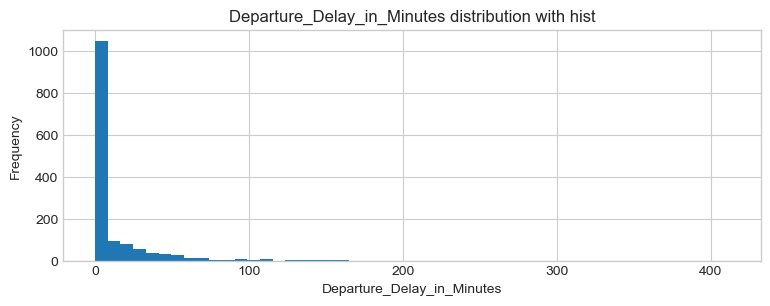

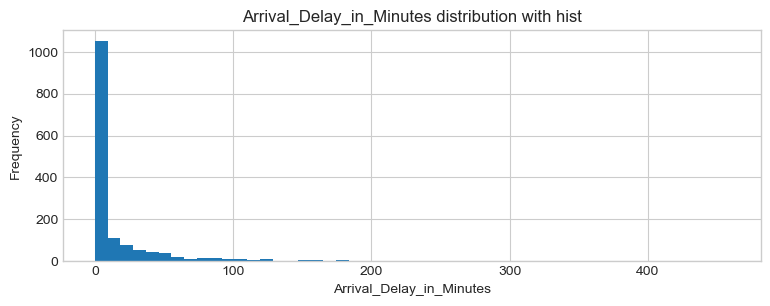

In [81]:
numerical_var = ["Age", "Flight_Distance", "Inflight_wifi_service", "Departure/Arrival_time_convenient", "Ease_of_Online_booking", "Gate_location", "Food_and_drink", "Online_boarding", "Seat_comfort", "Inflight_entertainment", "On-board_service", "Leg_room_service", "Checkin_service", "Inflight_service", "Cleanliness", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]
for n in numerical_var:
    plot_hist(n)

   Gender  satisfaction
1    Male      0.448276
0  Female      0.418065


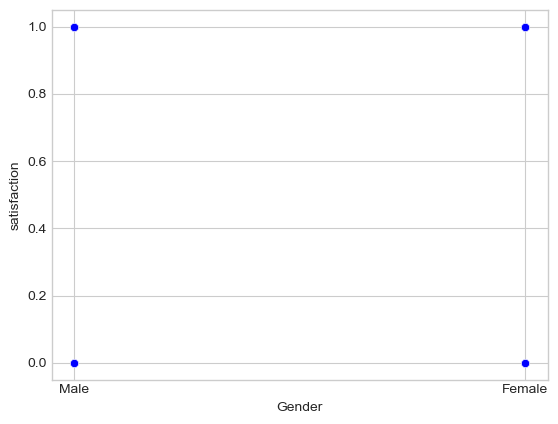

In [109]:
# Gender vs Satisfaction
print(train_df[["Gender","satisfaction"]].groupby(["Gender"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))



#create scatterplots to look for correlations
sns.scatterplot(x=train_df['Gender'],y=train_df['satisfaction'],color='blue')
plt.show();

      Class  satisfaction
0  Business      0.692521
2  Eco Plus      0.245283
1       Eco      0.183036


<AxesSubplot:xlabel='satisfaction'>

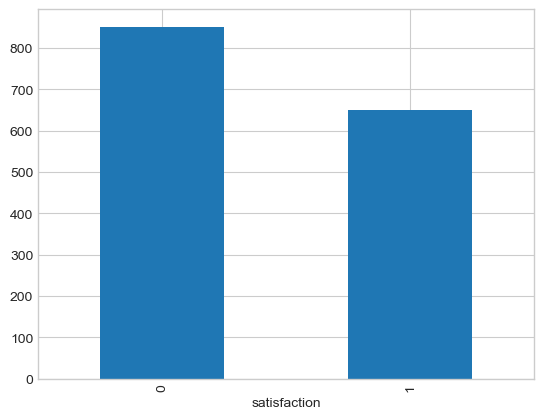

In [113]:
#create scatterplots to look for correlations Class vs satisfaction
# Class vs satisfaction
print(train_df[["Class","satisfaction"]].groupby(["Class"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))



%matplotlib inline

groupedClass.plot.bar()

       Customer_Type  satisfaction
0     Loyal Customer       0.46988
1  disloyal Customer       0.25098


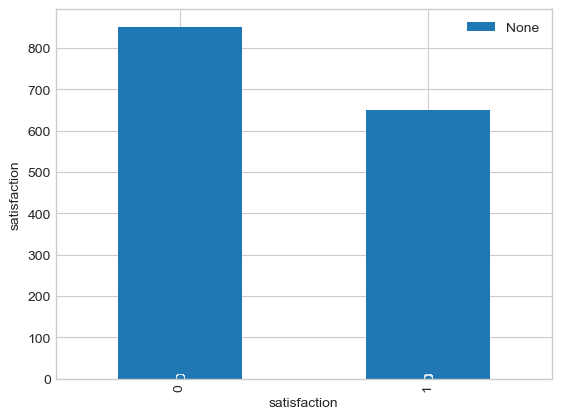

In [121]:
# Customer_Type vs satisfaction
print(train_df[["Customer_Type","satisfaction"]].groupby(["Customer_Type"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))
%matplotlib inline

groupedCustomer_Type.plot.bar()

sns.scatterplot(x='Customer_Type', y='satisfaction', data=train_df)
plt.show()



    Type_of_Travel  satisfaction
0  Business travel      0.600196
1  Personal Travel      0.073375


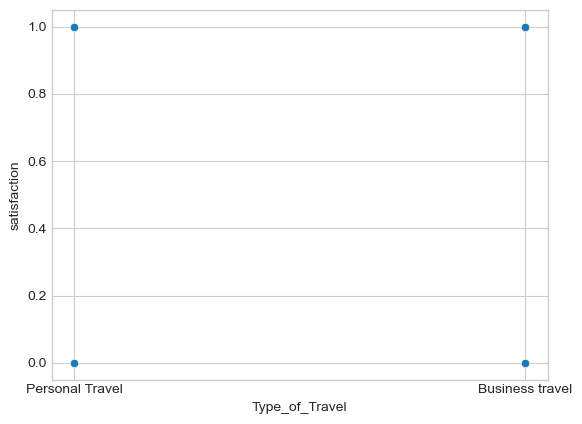

In [124]:
# Customer_Type vs satisfaction
print(train_df[["Type_of_Travel","satisfaction"]].groupby(["Type_of_Travel"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))


sns.scatterplot(x='Type_of_Travel', y='satisfaction', data=train_df)
plt.show()



In [125]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers


In [126]:
train_df.loc[detect_outliers(train_df,["Age", "Flight_Distance", "Inflight_wifi_service", "Departure/Arrival_time_convenient", "Ease_of_Online_booking", "Gate_location", "Food_and_drink", "Online_boarding", "Seat_comfort", "Inflight_entertainment", "On-board_service", "Leg_room_service", "Checkin_service", "Inflight_service", "Cleanliness", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"])]

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
80,Male,Loyal Customer,26,Business travel,Business,3960,1,1,1,1,...,4,4,2,5,4,4,4,45,48.0,1
717,Male,Loyal Customer,32,Business travel,Business,3802,0,0,0,1,...,5,3,2,5,4,5,5,90,86.0,1
1061,Male,Loyal Customer,57,Business travel,Business,3902,1,1,1,1,...,5,5,5,5,4,5,3,55,53.0,1
71,Male,Loyal Customer,30,Business travel,Eco Plus,205,3,2,2,2,...,3,2,5,1,1,2,3,64,49.0,0
305,Female,disloyal Customer,62,Business travel,Eco,255,3,3,2,2,...,2,1,5,3,1,3,2,113,107.0,0
424,Female,Loyal Customer,56,Personal Travel,Eco,236,3,3,3,3,...,4,4,3,4,1,4,5,57,52.0,0
429,Female,Loyal Customer,41,Business travel,Business,209,4,4,4,4,...,2,2,2,4,1,2,2,95,100.0,0
624,Female,disloyal Customer,28,Business travel,Eco,160,4,2,4,4,...,1,2,4,3,1,4,1,52,44.0,0
671,Male,Loyal Customer,35,Business travel,Business,589,2,4,1,4,...,2,2,2,2,1,2,3,44,46.0,0
805,Female,Loyal Customer,58,Business travel,Eco Plus,229,4,5,5,5,...,4,4,4,4,1,4,4,63,75.0,1


In [127]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age", "Flight_Distance", "Inflight_wifi_service", 
                                                   "Departure/Arrival_time_convenient", "Ease_of_Online_booking", "Gate_location",
                                                   "Food_and_drink", "Online_boarding", "Seat_comfort", "Inflight_entertainment", 
                                                   "On-board_service", "Leg_room_service", "Checkin_service", "Inflight_service",
                                                   "Cleanliness", "Departure_Delay_in_Minutes",
                                                   "Arrival_Delay_in_Minutes"]),axis = 0).reset_index(drop = True)

In [128]:
# lets do Classification with Different Machine Learning Algorithms
# Data Preprocessing

ctgrs = ["Gender","Customer_Type","Type_of_Travel"]

for x in ctgrs:
    
    train_df[x] = [1 if each == train_df[x].unique()[0] else 0 for each in train_df[x]]

In [129]:
# Here, since our variable takes 3 different values (business, eco plus and eco), we converted the data into numerical data with a different method.
# (1=Business, 2=Eco plus, 3=Eco)
train_df.Class = [1 if x == "Business" else 2 if x == "Eco Plus" else 3 for x in train_df.Class]

In [130]:
train_df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,1,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,0,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,0,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,0,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,0,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [131]:
test_df.drop(["Unnamed: 0","id"],axis=1, inplace=True)

test_df.columns = [x.split()[0] + "_" + x.split()[1] + "_" + x.split()[2] + "_" + x.split()[3] if len(x.split()) > 3 else x for x in test_df.columns]
test_df.columns = [x.split()[0] + "_" + x.split()[1] + "_" + x.split()[2] if len(x.split()) > 2 else x for x in test_df.columns]
test_df.columns = [x.split()[0] + "_" + x.split()[1] if len(x.split()) > 1 else x for x in test_df.columns]

In [132]:
test_df.satisfaction = [1 if x == "satisfied" else 0 for x in test_df.satisfaction]

test_df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [133]:
ctgrs2 = ["Gender","Customer_Type","Type_of_Travel"]

for x in ctgrs2:
    
    test_df[x] = [1 if each == test_df[x].unique()[0] else 0 for each in test_df[x]]

test_df.Class = [1 if x == "Business" else 2 if x == "Eco Plus" else 3 for x in test_df.Class]

In [134]:
# Train & Test Split and Normalization
x_train = train_df.drop(["satisfaction"],axis=1)
y_train = train_df.satisfaction.values


x_test = test_df.drop(["satisfaction"],axis=1)
y_test = test_df.satisfaction.values

In [135]:
x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))

x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

In [136]:
# Logistic Regression with Sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()

log.fit(x_train,y_train)

pred = log.predict(x_test)

#Now let's see how successful our predictions are:
print("with Logistic Regression accuracy_score: ",accuracy_score(y_test,pred))

with Logistic Regression accuracy_score:  0.8766666666666667


In [137]:
# lest create a decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

print("DecisionTreeClassifier: ", dt.score(x_test,y_test))


DecisionTreeClassifier:  0.92


In [138]:
# lets do a Random Forest:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

rf.fit(x_train,y_train)

print("with Random Forest score: ",rf.score(x_test,y_test))

with Random Forest score:  0.99


In [139]:
# leys do KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)

pred_for_knn = knn.predict(x_test)

print("with KNeighborsClassifier score: ",knn.score(x_test, y_test))


with KNeighborsClassifier score:  0.9433333333333334


if k values is 1 value score 1.0
if k values is 2 value score 0.94
if k values is 3 value score 0.9433333333333334
if k values is 4 value score 0.9233333333333333
if k values is 5 value score 0.9266666666666666
if k values is 6 value score 0.92
if k values is 7 value score 0.9266666666666666
if k values is 8 value score 0.9233333333333333
if k values is 9 value score 0.9233333333333333
if k values is 10 value score 0.92
if k values is 11 value score 0.91
if k values is 12 value score 0.91
if k values is 13 value score 0.91
if k values is 14 value score 0.91
if k values is 15 value score 0.9133333333333333
if k values is 16 value score 0.9133333333333333
if k values is 17 value score 0.9133333333333333


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


if k values is 18 value score 0.9066666666666666
if k values is 19 value score 0.9066666666666666


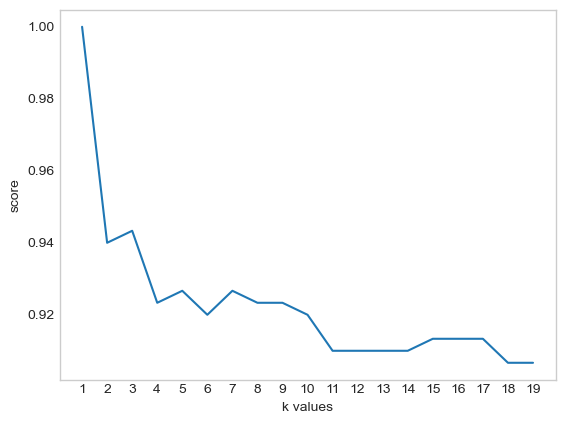

In [141]:
#We get an accuracy score of 94%, but we can change the K value and look at the success results of the algorithm and find the optimum K value.

score_list = []

for x in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=x)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    print("if k values is",x,"value score",knn2.score(x_test,y_test))


plt.plot(range(1,20),score_list)
plt.xticks(range(1,20))
plt.xlabel("k values")
plt.ylabel("score")
plt.legend()
plt.grid()
plt.show()